This is a supervised machine learning model created for Intro To NLP course AIT526. I have created a basic implementation of SVM model creating a pipeline as a part of my project. Here are the steps:
1. Data visualization
2. Pre processing the data
3. Performing TF-IDF vectorization
4. Creating SVM model
5. Cross validation
6. Performance metrics
7. Error analysis

**Step 01: Data visualization** In this stage, I am analyzing the features of the dataset and modify it according to my project requirements.

First, I am importing necessary libraries for my project

In [85]:
#Importing libraries 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tabulate import tabulate

After getting the required libraries, Now I am loading the dataset. It is an amazon review dataset based on beauty products. The dataset is collected from https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews

The dataset is very large. For this project, we have selected random 10 thousand random data points from this dataset. 

In [62]:
# load the csv file
data = pd.read_csv('/content/sample_data/Data.csv')

In [63]:
#Visualizing the initial data 
data.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,US,49831754,RLMKEGYR1J5RV,B000G0GW6K,787762150,Panasonic(r) Es2216pc Ladies' Close Curves(r) ...,Beauty,5,0,0,N,Y,Shaver,Love this razor. I like the size and the fact ...,2013-05-03\n
1,1,US,8236225,RVGSM7UEB03Z8,B004HJ1798,922211650,Onyx Professional Spray On Nail Dry w/ Island ...,Beauty,3,4,5,N,Y,Three Stars,Doesn't seem to dry my nails any faster.,2015-08-05\n
2,2,US,4069021,R32XJXEPEQG0BO,B001N3P684,206189463,Ped Egg Pedicure Foot File,Beauty,4,0,0,N,Y,Four Stars,just what we needed,2015-05-14\n
3,3,US,10835015,R27CGEI5FVAVTM,B007EQU3DC,34306879,1 OZ A+ Sacred Lotus Stamens Nelumbo nucifera,Beauty,5,5,6,N,Y,great product,This lotus is great. Good potency. My suggesti...,2014-06-06\n
4,4,US,13157724,REE0MWSR9KMEH,B00T546HD6,838726379,Psoriasis / Eczema Herbal Ointment - 100% All ...,Beauty,5,0,0,N,N,My oldest son has really bad eczema that flare...,My oldest son has really bad eczema that flare...,2015-06-03\n


Now, I am selecting the columns we need and extract them from the dataset creating a subset of the original data. The columns contains the information including user review and rating accordingly.

In [64]:
# select the required columns
new_data = data[['13', '7']]

Next step: Renaming the columns based on preference. 

In [65]:
#Rename the columns as "text" and "rating" text=user review and rating=user rating
new_data = new_data.rename(columns={'13': 'review','7' : 'rating'})
new_data.head()

,review,rating
0,Love this razor. I like the size and the fact ...,5
1,Doesn't seem to dry my nails any faster.,3
2,just what we needed,4
3,This lotus is great. Good potency. My suggesti...,5
4,My oldest son has really bad eczema that flare...,5


Now, as a part of data visualisation I am counting the frequency of each rating. 

In [66]:
# Count the number of occurrences (frequency) of each rating in the "rating" column
rating_counts = new_data['rating'].value_counts()
print(rating_counts)

5    6399
4    1454
1     874
3     760
2     513
Name: rating, dtype: int64


(0.0, 7000.0)

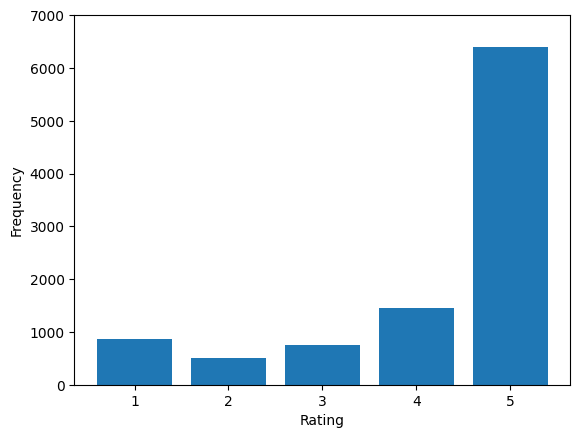

In [67]:
#Visualizing the frequency of different rating groups using a bar diagram
import numpy as np
x= np.array([874,513,760,1454,6399])
y=np.array([1,2,3,4,5])
#plt.hist2d(y, x)
plt.bar(y, x)
# set the plot title and axis labels
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.ylim([0, 7000])


**Step 02: Pre processing the data** Preprocessing is one of the most important steps of a machine learning project. It improves the quality of input data and make it more suitable for analysis. 

There are many preprocessing techniques available. In this project, I am using Texthero. Texthero is a python package for text based dataset. More resources can be found here https://texthero.org/docs/getting-started 

In [12]:
#installing required packages 
!pip install texthero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527909 sha256=0a747cd891edd62f205e3bc1ec194f8c0beceeea13e25ff031810855765570b7
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [13]:
!pip install texthero -U


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.6/491.6 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.5/922.5 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
      Successfully uninstalled spacy-2.3.9
ERROR: pip's dependency resolver does not currently 

In [68]:
import texthero as hero

For this project, I am applying 3 pre-processing tasks creating a custom pipeline "prep_pipeline" 
Here are the three tasks I am performing:

1. fillna: This function replaces any missing values (NaNs) in the 'review' column with an empty string.
2. lowercase: This function converts all text in the 'review' column to lowercase.
3. remove_stopwords: This function removes common stopwords (such as "the", "and", "a", etc.) from the 'review' column.

In [69]:
new_data['review'] = hero.clean(new_data['review'])
new_data.head()

from texthero import preprocessing

prep_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_stopwords]
new_data['review'] = hero.clean(new_data['review'], prep_pipeline)




In [70]:
#Visualizing the data after pre-processing
new_data.head()

,review,rating
0,love razor like size fact use wet dry places u...,5
1,seem dry nails faster,3
2,needed,4
3,lotus great good potency suggestion steep swee...,5
4,oldest son really bad eczema flares baseball s...,5


**Step 03: Performing TF-IDF vectorization**
TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization is commonly conducted after the data pre-processing steps in NLP. In NLP, data pre-processing includes cleaning and transforming raw text input into a format suitable for analysis or training machine learning models.

In [71]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [72]:
X=tfidf.fit_transform(new_data['review'])
Y=new_data['rating']

In [73]:
X.shape, Y.shape

((10000, 5000), (10000,))

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [75]:
X_train.shape

(8000, 5000)

**Step 04: Creating SVM model**
Here, I am using LinearSVC classifier which is a type of linear support vector machine (SVM) that maximizes the margin between different classes of data in a high-dimensional feature space to learn an estimation boundary between them. Since it can handle features with high dimensions and large datasets efficiently, it is a preferred choice for text classification tasks.

Now, I am performing regularization. In this step, I am creating a function to find out the best random state and the cross-validation score for the mode

In [87]:
# Exploring the range of seed values 
seed_range = range(1, 10)

# Initialize variables 
best_seed = None 
best_score = 0

# Loop through each seed value and train the SVM model with cross-validation
for seed in seed_range:
    clf = SVC(kernel='linear', C=20, random_state=seed, class_weight='balanced')
    scores = cross_val_score(clf, X, Y, cv=5)
    mean_score = scores.mean()
    
    # Check if the current seed value results in a better score than the previous best
    if mean_score > best_score:
        best_score = mean_score
        best_seed = seed

# Display the best seed value and score
print("Best seed value:", best_seed)
print("Best cross-validation score:", best_score)

Best seed value: 1
Best cross-validation score: 0.5856


In [88]:
clf= SVC(kernel='linear', C=20, random_state=1, class_weight='balanced')
clf.fit(X_train,Y_train)

SVC(C=20, class_weight='balanced', kernel='linear', random_state=1)

In [89]:
Y_pred = clf.predict(X_test)

**Step 05: Cross validation**
Cross-validation is an important technique for evaluating a model's performance and generalization capabilities, and it can help to improve the accuracy and dependability of machine learning applications. Here, I am using K-fold cross validation. 

In [90]:
#'cv'=5 meaning 5-fold cross validation
scores = cross_val_score(clf, X, Y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.5855 0.58   0.5855 0.593  0.584 ]
Average score: 0.5856


**Step 06: Performance metrics**
Evaluating a model's performance is a crucial step in the development process in machine learning since it allows us to determine how effectively the model can generalize to new, unseen data. A classification report is one method for evaluating the performance of a classification model, such as an SVM classifier.

In [91]:
#Performance metrics of the model
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.46      0.51      0.48       183
           2       0.15      0.12      0.13       121
           3       0.19      0.25      0.21       132
           4       0.26      0.26      0.26       292
           5       0.80      0.77      0.79      1272

    accuracy                           0.60      2000
   macro avg       0.37      0.38      0.38      2000
weighted avg       0.61      0.60      0.60      2000



**Step 07: Error analysis**
A vital stage in the creation of a machine learning model is error analysis. The purpose of error analysis is to detect and comprehend the types of errors made by the model on the test set, and to use this knowledge to improve the model's performance. Here I am using confusion matrix for analyzing error. 

In [92]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
#print("Confusion matrix:\n", cm)
#Creating a table with the values of confusion matrix
# create table headers
headers = ['True Label','Predicted rating: 1', 'Predicted rating: 2', 'Predicted rating: 3', 'Predicted rating: 4','Predicted rating: 5']
# creating table rows
rows = []
for i, row in enumerate(cm):
    rows.append([f'Actual rating: {i+1}'] + list(row))

# print confusion matrix as table
print("Confusion Matrix \n")
print(tabulate(rows, headers=headers))

Confusion Matrix 

True Label          Predicted rating: 1    Predicted rating: 2    Predicted rating: 3    Predicted rating: 4    Predicted rating: 5
----------------  ---------------------  ---------------------  ---------------------  ---------------------  ---------------------
Actual rating: 1                     94                     20                     16                     14                     39
Actual rating: 2                     33                     14                     24                     18                     32
Actual rating: 3                     20                     16                     33                     28                     35
Actual rating: 4                     19                     16                     42                     76                    139
Actual rating: 5                     39                     26                     60                    162                    985


Now, I am saving the model for future use. 

In [97]:
#saving the model
import joblib
joblib.dump(clf, 'svm.joblib')

['svm.joblib']

Now, it's time to test the model with some reviews. Here I am manually testing this model with a few sample reviews to see which rating it predicts for my reviews. 

In [94]:
#testing with sample review
review1 = 'I dont like it, average product nothing special.'
vect = tfidf.transform([review1])
clf.predict(vect)

array([2])

In [95]:
review2 = 'Awsome! Will recommend to my friends.'
vect = tfidf.transform([review2])
clf.predict(vect)

array([5])

In [96]:
review3 = 'worst experience..'
vect = tfidf.transform([review3])
clf.predict(vect)

array([1])

Reference
1. https://texthero.org/docs/getting-started
2. https://scikit-learn.org/stable/modules/svm.html
3. https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/
4. https://www.freecodecamp.org/news/how-to-work-and-understand-text-based-dataset-with-texthero/